# Portfolio Project - Biodiversity in National Parks
***
## Background
In this project, you will intepret data provided by the National Parks Service, focusing on endangered species found across different park locations. The primary objective is to conduct thorough data analysis, clean up inconsistencies, and plot relevant information regarding the conservation statuses of these species. As you delve deeper, you will explore potential patterns or themes underlying the types of species that become endangered within these protected areas.

Throughout this project, your analytical journey will involve posing pertinent questions and seeking meaningful answers through the processed data. You will analyse the cleaned-up datasets, seeking insights into the factors contributing to species endangerment within national parks. By utilising data visualisation techniques, the aim is to present findings in a clear and informative manner, shedding light on the conservation challenges faced by the National Park Service.

Upon completion of data analysis, you will compile discoveries and insights gleaned from the data. The ultimate goal is to share comprehensive findings and observations regarding endangered species within national parks, thereby contributing valuable knowledge to the ongoing conservation efforts led by the National Parks Service.
***
## Ask
### Goal
To examine biodiversity data provided by the National Parks Service, focusing on the diverse species observed across different national park locations.
### Questions
- What is the distribution of `conservation_status` for animals?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which species were spotted the most at each park?
- Which park has the highest and the lowest number of mammals?
- Which animal is most prevalent and what is their distribution amongst parks?
- What is the distribution of sheep sightings across the different national parks?
***
## Prepare and Process
### Data Sources
- Datasets `observations.csv` and `species_info.csv` provided by [Codecademy.com](https://www.codecademy.com) were used.
### Import Python Packages

In [157]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

### Load the Data
Load the two datasets (csv files): `observations.csv` and `species_info.csv`

The `Observations.csv` file comprises data from observations of various species across national parks in the last 7 days. The columns are:
- **scientific_name**: The scientific name of each species
- **park_name**: The name of the national park
- **observations**: The number of observations in the past 7 days

In [160]:
observations = pd.read_csv('observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


The `species_info.csv` file provides details about the different species within the National Parks. The columns in the data set include:
- **category**: The category of taxonomy for each species
- **scientific_name**: The scientific name of each species
- **common_names**: The common names of each species
- **conservation_status**: The species conservation status

In [163]:
species = pd.read_csv('species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


### Explore the Data
#### Observations

- How many park are there?

Looking at the `observations`data, there are 4 national parks in the dataset, which are "Great Smoky Mountains National Park", "Yosemite National Park", "Bryce National Park", and "Yellowstone National Park".

In [166]:
observations.park_name.nunique()

4

In [168]:
observations.park_name.unique()

array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

- Number of observations in the last 7 days
A total of 3,314,739 observations have been recorded in the parks over the past seven days.

In [171]:
observations.observations.sum()

3314739

The output below provides an overview of the summary statistics for each park site. As shown, although the four parks are of the same size, their mean, standard deviation, maximum, and minimum values for observations differ.

In [174]:
observations.sort_values(by=['park_name']).groupby("park_name").size()

park_name
Bryce National Park                    5824
Great Smoky Mountains National Park    5824
Yellowstone National Park              5824
Yosemite National Park                 5824
dtype: int64

In [176]:
observations.sort_values(by=['park_name']).groupby("park_name").describe()

observations                               \
                                           count        mean        std   min   
park_name                                                                       
Bryce National Park                       5824.0   98.905391  20.762061   9.0   
Great Smoky Mountains National Park       5824.0   74.144918  20.315457  10.0   
Yellowstone National Park                 5824.0  247.864354  23.168872  57.0   
Yosemite National Park                    5824.0  148.236951  21.221617  31.0   

                                                                 
                                       25%    50%    75%    max  
park_name                                                        
Bryce National Park                   85.0   99.0  113.0  176.0  
Great Smoky Mountains National Park   60.0   74.0   88.0  147.0  
Yellowstone National Park            235.0  249.0  262.0  321.0  
Yosemite National Park               134.0  149.0  162.0  223.0

#### Species

- How many different species are in the `species` dataframe?

To determine the number of distinct species in the data, use the column `scientific_name` to identify 5,541 unique species.

In [179]:
species.scientific_name.nunique()

5541

To determine the number of `category` represented in the data, there are 7 categories, including animals and plants.

In [182]:
species.category.unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

- What are the different values of `category` in `species`?

Vascular plants make up the largest portion of species in the data, totaling 4,470, while reptiles are the least represented, with only 79 species.

In [185]:
species.groupby("category").size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

## Analysis

To examine the `conservation_status` column, it includes four categories: 'Species of Concern', 'Endangered', 'Threatened', 'In Recovery', as well as `nan` values.

In [188]:
print(species.conservation_status.nunique())

print(species.conservation_status.unique())

4
[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [190]:
print(f"na values:{species.conservation_status.isna().sum()}")
print(species.groupby("conservation_status").size())

na values:5633
conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


**Replace `nan` values into `No Intervention`.**

In [193]:
species.fillna('No Intervention', inplace=True, limit=None)
species.groupby("conservation_status").size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

***
### - What is the distribution of conservation status for species?

In [196]:
conservationCategory = species[species.conservation_status != "No Intervention"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()
conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


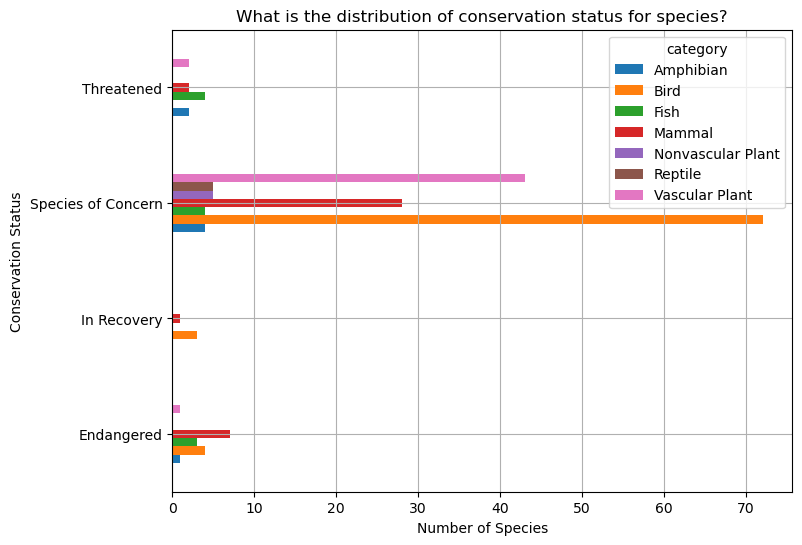

In [198]:
plot1 = conservationCategory.plot(kind = 'barh', stacked = False, figsize=(8,6), 
                                  title= 'What is the distribution of conservation status for species?', 
                                  legend=True, 
                                  grid=True)

plot1.set_xlabel("Number of Species")
plot1.set_ylabel("Conservation Status")

plt.show()

As can be seen from the bar chart above, the majority of the 5,633 species are not part of conservation efforts. Among those that are, 161 are classified as species of concern, 16 are endangered, 10 are threatened, and 4 are in recovery.
***

### - Are certain types of species more likely to be endangered?

To anwer the question, create a new column called `is_protected` and include any species that had a value other than `No Intervention`.species['is_protected'] = species.conservation_status != 'No Intervention'

In [202]:
species['is_protected'] = species.conservation_status != 'No Intervention'
species.head(5)

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False


After creating the new column, group the data by `category` and `is_protected` to display the breakdown of each species type and its protection status. It becomes clear that Birds, Vascular Plants, and Mammals have a higher total number of protected species.

In [205]:
category_counts = species.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


It's essential to calculate the protection rate for each category in the data. This analysis reveals that approximately 17% of mammals and around 15% of birds are under protection.

In [208]:
category_counts['percent_protected'] = (category_counts.protected / \
                                      (category_counts.protected + category_counts.not_protected) * 100).round(2)

category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.86
1,Bird,413,75,15.37
2,Fish,115,11,8.73
3,Mammal,146,30,17.05
4,Nonvascular Plant,328,5,1.50
5,Reptile,73,5,6.41
6,Vascular Plant,4216,46,1.08


***
### - Are the differences between species and their conservation status significant?

This section will conduct chi-squared tests to determine whether different species exhibit statistically significant differences in conservation status rates. To perform the chi-squared test, a contingency table needs to be created, which should be structured as follows:

* The first test, named `contingency1`, will be populated with the appropriate numbers for mammals and birds.

||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Bird|?|?|


In [211]:
from scipy.stats import chi2_contingency

contingency1 = [[30, 146],
              [75, 413]]
chi2_contingency(contingency1)

chi2, pval, dof, expected = chi2_contingency(contingency1)
print(pval.round(5))

0.68759


The chi-squared test returns several values, with the second value being the p-value, which in this case is 0.69. The standard threshold for statistical significance is a p-value of 0.05. Since 0.69 is much greater than 0.05, there does not appear to be a significant relationship between mammals and birds.



* The next test will compare the differences between `Reptiles` and `Mammals`.

In [214]:
contingency2 = [[30, 146],
               [5, 73]]
chi2_contingency(contingency2)

chi2, pval, dof, expected = chi2_contingency(contingency2)

print(pval.round(5))

0.03836


In this case, the p-value is 0.039, which falls below the standard threshold of 0.05. This suggests that the difference between Reptiles and Mammals is statistically significant. Mammals are found to have a noticeably higher rate of protection compared to Reptiles.


* Is the difference between `Amphibian` and `Vascular Plant` significant?

In [217]:
contingency3 = [[72, 7],
               [4216, 46]]
chi2_contingency(contingency3)

Chi2ContingencyResult(statistic=32.7572979770742, pvalue=1.0441355146657018e-08, dof=1, expected_freq=array([[7.80354757e+01, 9.64524303e-01],
       [4.20996452e+03, 5.20354757e+01]]))

It is evident that the p-value is very low, indicating that the difference between `Amphibians` and `Vascular Plants` is statistically significant.

**From this analysis, we can conclude that there is an association between species category and their conservation status.**

### - Which species were spotted the most at each park?

In [221]:
y = observations.groupby(['park_name', 'scientific_name'])['observations'].max().reset_index()\
                                                                          .sort_values(by='observations', ascending=False)

y.groupby('park_name').first()

,scientific_name,observations
park_name,,
Bryce National Park,Valerianella radiata,176
Great Smoky Mountains National Park,Sonchus asper ssp. asper,147
Yellowstone National Park,Lycopodium tristachyum,321
Yosemite National Park,Ivesia shockleyi var. shockleyi,223


Using the dataframe above, we can observe the following:

- The most frequently spotted species in Bryce National Park is `Valerianella radiata`.
- In Great Smoky Mountains National Park, the most commonly spotted species is `Sonchus asper ssp. asper`.
- For Yellowstone National Park, `Lycopodium tristachyum` is the most spotted species.
- In Yosemite National Park, the most frequently observed species is `Ivesia shockleyi var. shockleyi`.

### - Which park has the highest and the lowest number of mammals ?

In [225]:
z = observations.merge(species)

mammal_specis = z[z.category == "Mammal"]

mammal_specis.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,28830
1,Great Smoky Mountains National Park,21056
2,Yellowstone National Park,70701
3,Yosemite National Park,42533


Yellowstone National Park has the highest number of mammals, while Great Smoky Mountains National Park has the lowest.


- The same dataframe can also be used to analyse other species categories, such as `Fish`.

In [228]:
z = observations.merge(species)

mammal_specis = z[z.category == "Fish"]

mammal_specis.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,12823
1,Great Smoky Mountains National Park,9482
2,Yellowstone National Park,31459
3,Yosemite National Park,19137


It can be seen that Yellowstone National Park has the highest and Great Smoky Mountains National Park has the lowest number of fish.

### - Which animal is most prevalent and what is their distribution amongst parks?

Over the past 7 days, conservationists have been documenting sightings of various species across several national parks and have provided their observations in a file called `observations.csv`.

To begin, we need to examine the common names from the `species` dataset to identify the most prevalent animals. Upon reviewing the `common_names` column, it is clear that the data requires cleaning, including removing punctuation and separating it into individual names.

In [232]:
from itertools import chain
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_Names = species[species.category == "Mammal"]\
    .common_names\
    .apply(remove_punctuations)\
    .str.split().tolist()

common_Names[:5]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk']]

The next step is to remove duplicate words in each row, as they should only be counted once per species.

In [235]:
cleanRows = []

for item in common_Names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)
    
cleanRows[:5]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk']]

Next, the words need to be combined into a single list for simplicity and easier analysis.

In [238]:
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))
res[:15]

['Gappers',
 'RedBacked',
 'Vole',
 'American',
 'Bison',
 'Aurochs',
 'Domestic',
 'Cattle',
 'Feral',
 'Domesticated',
 'Domestic',
 'Sheep',
 'Mouflon',
 'Red',
 'Feral']

Now, count the occurrences of each word in the combined list, store the results in a dataframe, and sort it by descending order of the words count.

In [241]:
words_counted = []

for i in res:
    x = res.count(i)
    words_counted.append((i,x))

pd.DataFrame(set(words_counted), columns =['Word', 'Count']).sort_values("Count", ascending = False).head(10)

,Word,Count
191,Bat,23
178,Shrew,18
113,Myotis,17
23,Mouse,16
137,Chipmunk,13
49,American,12
105,Squirrel,12
95,Vole,11
4,Eastern,11
94,Western,10


The data reveals that bats are the most prevalent animal in the dataset, with multiple scientific names representing various bat species. To identify the rows corresponding to bats, a new column called `is_bat` will be added. This column will contain boolean values, where `True` indicates the species is a bat, and `False` indicates it is not.

In [244]:
species['is_bat'] = species.common_names.apply(lambda x: True if 'Bat' in x else False)

species.head(10)

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False


Here is a subset of the data where `is_bat` is true, showing the rows that match. It appears there are many species of bats, with a mix of protected and non-protected species.

In [247]:
species[(species.is_bat) & (species.category == "Mammal")]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,True


Next, the bat species data will be merged with the observations dataset to create a DataFrame containing bat sightings across the four national parks.

In [250]:
bat_observations = observations.merge(species[(species.is_bat) & (species.category == "Mammal")])
bat_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
...,...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True


The table below shows the total number of bat sightings in each park over the past 7 days. **Yellowstone National Park** has the highest number, with 8,362 observations, while the **Great Smoky Mountains National Park** has the lowest, with 2,411.

In [253]:
bat_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


Next, to examine the breakdown of bat sightings in each park, separating protected bats from non-protected bats. It appears that, except for Great Smoky Mountains National Park, every park has more sightings of protected bats than non-protected ones. This could be seen as a positive sign for bat conservation.

In [256]:
bat_obs_by_park = bat_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
bat_obs_by_park

,park_name,is_protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


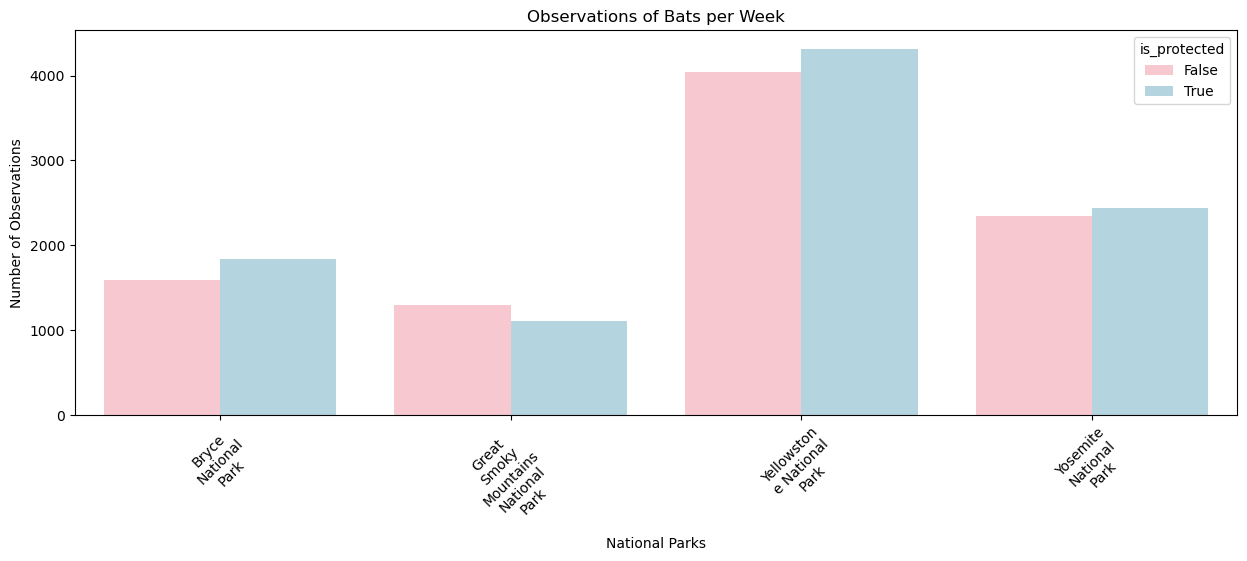

In [258]:
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

plt.figure(figsize=(15, 5))
sns.barplot(data=bat_obs_by_park, x='park_name', y='observations', hue='is_protected', palette={True: 'lightblue', False: 'pink'})
plt.title('Observations of Bats per Week')
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')

# Wrap long x-axis labels
labels = plt.gca().get_xticklabels()
wrapped_labels = [textwrap.fill(label.get_text(), 10) for label in labels]  # Wrap text to 10 characters
plt.gca().set_xticklabels(wrapped_labels)

plt.xticks(rotation=45)  # Rotate labels to 45 degrees for better readability
plt.show()

As shown in this chart, Yellowstone and Bryce National Parks appear to be effectively supporting their bat populations, as evidenced by the higher number of protected bat sightings compared to non-protected species. On the other hand, Great Smoky Mountains National Park may need to enhance its conservation efforts, as it has observed more non-protected bat species.

***

### - What is the distribution of sheep sightings across the different national parks?

Firstly, there are multiple scientific names representing different types of sheep. We need to identify which rows in the species dataset refer to sheep. The following code demonstrates how to determine whether a specific word appears in a string:

In [262]:
# Does "Sheep" occur in this string?
str1 = 'This string contains Sheep'
'Sheep' in str1

True

In [264]:
# Does "Sheep" occur in this string?
str2 = 'This string contains Cows'
'Sheep' in str2

False

Use the apply method with a lambda function to add a new column to the `species` dataset called `is_sheep`. This column should return `True` if the `common_names` field contains the word "Sheep" and `False` otherwise.

In [267]:
species['is_sheep'] = species.common_names.apply(lambda x: True if 'Sheep' in x else False)

species.head(10)

,category,scientific_name,common_names,conservation_status,is_protected,is_bat,is_sheep
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False,True
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False,False


Select the rows in the species dataset where `is_sheep` is True and review the resulting data.

In [270]:
species[species.is_sheep]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat,is_sheep
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False,True
1139,Vascular Plant,Rumex acetosella,"Sheep Sorrel, Sheep Sorrell",No Intervention,False,False,True
2233,Vascular Plant,Festuca filiformis,Fineleaf Sheep Fescue,No Intervention,False,False,True
3014,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,False,True
3758,Vascular Plant,Rumex acetosella,"Common Sheep Sorrel, Field Sorrel, Red Sorrel,...",No Intervention,False,False,True
3761,Vascular Plant,Rumex paucifolius,"Alpine Sheep Sorrel, Fewleaved Dock, Meadow Dock",No Intervention,False,False,True
4091,Vascular Plant,Carex illota,"Sheep Sedge, Smallhead Sedge",No Intervention,False,False,True
4383,Vascular Plant,Potentilla ovina var. ovina,Sheep Cinquefoil,No Intervention,False,False,True
4446,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,False,True


Many of the results turn out to be plants. Filter the rows in the `species` dataset where `is_sheep` is True and the category is `Mammal`, then save the filtered data to a variable named `sheep_species`.

In [273]:
sheep_species = species[(species.is_sheep) & (species.category == 'Mammal')]

sheep_species

,category,scientific_name,common_names,conservation_status,is_protected,is_bat,is_sheep
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False,True
3014,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,False,True
4446,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,False,True


Next, merge the `sheep_species` dataset with the `observations` dataset to create a dataframe containing sheep observations. Save this new dataframe as `sheep_observations`.

In [276]:
sheep_observations = observations.merge(sheep_species)

sheep_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat,is_sheep
0,Ovis canadensis,Yellowstone National Park,219,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,False,True
1,Ovis canadensis,Bryce National Park,109,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,False,True
2,Ovis canadensis,Yosemite National Park,117,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,False,True
3,Ovis canadensis,Great Smoky Mountains National Park,48,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,False,True
4,Ovis canadensis sierrae,Yellowstone National Park,67,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,False,True
5,Ovis canadensis sierrae,Yosemite National Park,39,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,False,True
6,Ovis canadensis sierrae,Bryce National Park,22,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,False,True
7,Ovis canadensis sierrae,Great Smoky Mountains National Park,25,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,False,True
8,Ovis aries,Yosemite National Park,126,Mammal,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False,True
9,Ovis aries,Great Smoky Mountains National Park,76,Mammal,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False,True


To determine the total number of sheep observations (across all three species) recorded at each national park, use the groupby function to calculate the sum of observations for each `park_name`. Save the result to a variable called `sheep_obs_by_park`.

In [279]:
sheep_obs_by_park = sheep_observations.groupby('park_name').observations.sum().reset_index()

sheep_obs_by_park

,park_name,observations
0,Bryce National Park,250
1,Great Smoky Mountains National Park,149
2,Yellowstone National Park,507
3,Yosemite National Park,282


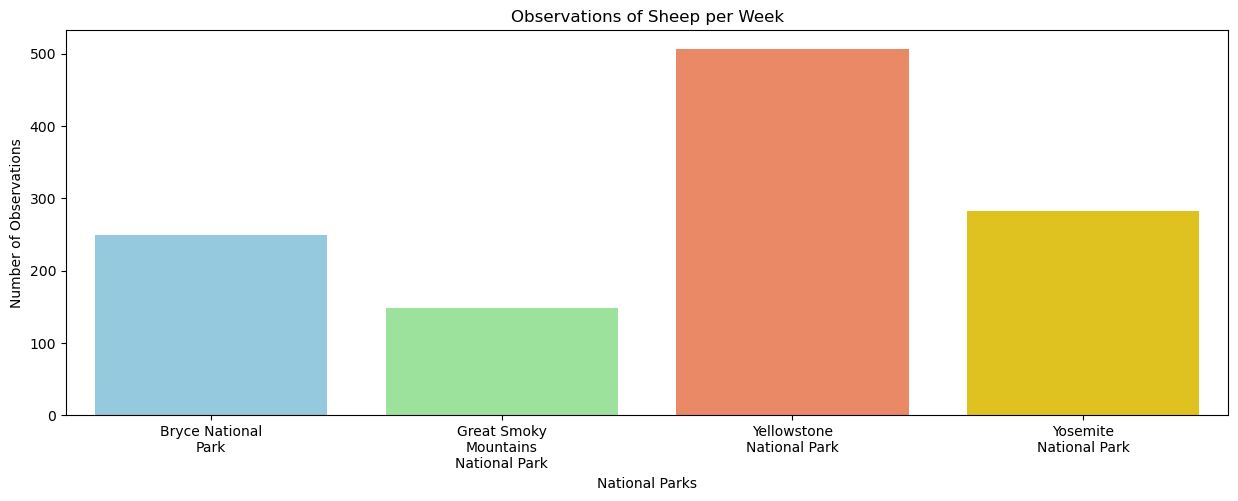

In [281]:
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

colors = ['skyblue', 'lightgreen', 'coral', 'gold']  # Define a list of colors for the bars
plt.figure(figsize=(15, 5))
sns.barplot(data=sheep_obs_by_park, x='park_name', y='observations',palette=colors)
plt.title('Observations of Sheep per Week')
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')

# Wrap long x-axis labels
labels = plt.gca().get_xticklabels()
wrapped_labels = [textwrap.fill(label.get_text(), 15) for label in labels]  # Wrap text to 15 characters
plt.gca().set_xticklabels(wrapped_labels)

plt.show()

## Conclusion

The project successfully created multiple data visualisations and derived insights about various species in four national parks included in this dataset.

It also addressed several key questions posed at the start:

**- What is the distribution of `conservation_status` for animals?**

The majority of species were not part of conservation efforts (5,633 compared to 191).

**- Are certain types of species more likely to be endangered?**

Mammals and birds had the highest percentages of species under protection.

**- Are the differences between species and their conservation status significant?**

While mammals and birds **did not** show a significant difference in conservation percentages, mammals and reptiles exhibited a statistically significant difference.

**- Which species were spotted the most at each park?**
> 1. In Bryce National Park, the most frequently spotted species is `Valerianella radiata`.
2. In Great Smoky Mountains National Park, the most commonly observed species is `Sonchus asper ssp. asper`.
3. In Yellowstone National Park, the species with the highest sightings is `Lycopodium tristachyum`.
4. In Yosemite National Park, the most spotted species is `Ivesia shockleyi var. shockleyi`.

**- Which park has the highest and the lowest number of mammals?**

Yellowstone National Park has the largest number of mammals, while Great Smoky Mountains National Park has the smallest.

**- Which animal is most prevalent and what is their distribution amongst parks?**

Bats were identified as the most frequently occurring species, with Yellowstone National Park having the highest number of bat sightings.

**- What is the distribution of sheep sightings across the different national parks?**

The distribution of sheep sightings across the parks indicates that Yellowstone National Park has the highest number of sightings (507), while Great Smoky Mountains National Park has the lowest (149). Bryce National Park and Yosemite National Park have 250 and 282 sightings, respectively.

## Further Research

This dataset only captures observations from the past 7 days, limiting the ability to analyse changes over time. It would be interesting to examine how the conservation status of various species changes over a longer period. Another missing element is the size of each park; for instance, Yellowstone National Park might be significantly larger than the others, potentially explaining its higher number of observations and greater biodiversity. Additionally, if precise locations were recorded, the spatial distribution of species could be analysed to determine whether these observations are geographically clustered.